In [94]:
import pandas as pd
import matplotlib.pyplot as plt

In [96]:
data = pd.read_csv('../20220804/data/bmi.csv', encoding='euc-kr', index_col='label')

# Predict label by Height,  Weight
## Categorical Crossentropy

In [98]:
data

,height,weight
label,,
normal,140,45
fat,145,72
fat,150,61
fat,137,56
thin,192,48
...,...,...
fat,157,67
normal,138,40
normal,163,62


# Data Analysis

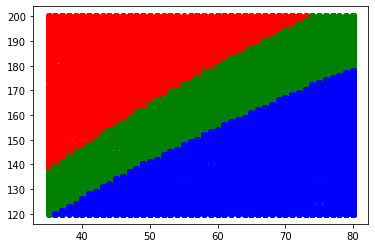

In [117]:
plt.scatter(data.loc['thin', 'weight'], data.loc['thin', 'height'], c='r')

plt.scatter(data.loc['normal', 'weight'], data.loc['normal', 'height'], c='g')

plt.scatter(data.loc['fat', 'weight'], data.loc['fat', 'height'], c='b')

In [118]:
def scatter(index, color):
    b = data.loc[index]
    plt.scatter(b['weight'], b['height'], c=color, label=index)

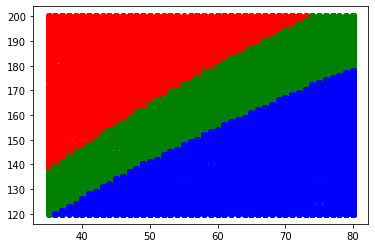

In [119]:
scatter('thin', 'r')
scatter('normal', 'g')
scatter('fat', 'b')

In [120]:
data = pd.read_csv('../20220804/data/bmi.csv')

In [121]:
data.head()

,height,weight,label
0,140,45,normal
1,145,72,fat
2,150,61,fat
3,137,56,fat
4,192,48,thin


In [123]:
data['label'].value_counts()

fat       7712
thin      6338
normal    5950
Name: label, dtype: int64

In [125]:
data.shape

(20000, 3)

In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   height  20000 non-null  int64 
 1   weight  20000 non-null  int64 
 2   label   20000 non-null  object
dtypes: int64(2), object(1)
memory usage: 468.9+ KB


# Data Split

In [128]:
data

,height,weight,label
0,140,45,normal
1,145,72,fat
2,150,61,fat
3,137,56,fat
4,192,48,thin
...,...,...,...
19995,157,67,fat
19996,138,40,normal
19997,163,62,normal
19998,169,68,normal


In [131]:
train_data = data.iloc[:14000, :]
test_data = data.iloc[14000:, :]

In [140]:
train_data

,height,weight,label
0,140,45,normal
1,145,72,fat
2,150,61,fat
3,137,56,fat
4,192,48,thin
...,...,...,...
13995,167,56,normal
13996,142,45,normal
13997,160,44,thin
13998,158,80,fat


In [172]:
X_train = train_data.iloc[:, :2]
y_train = train_data.iloc[:, 2]

X_test = test_data.iloc[:, :2]
y_test = test_data.iloc[:, 2]

print(X_train.shape, end='')
print(' ', y_train.shape, '\n')

print(X_test.shape, end='')
print(' ', y_test.shape)

(14000, 2)  (14000,) 

(6000, 2)  (6000,)


In [161]:
data = pd.read_csv('../20220804/data/bmi.csv')

In [163]:
from sklearn.model_selection import train_test_split

In [167]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [171]:
print(X_train.shape, end='')
print(' ', y_train.shape, '\n')

print(X_test.shape, end='')
print(' ', y_test.shape)

(14000, 2)  (14000,) 

(6000, 2)  (6000,)


# Model 

In [170]:
from sklearn.neighbors import KNeighborsClassifier

In [179]:
model = KNeighborsClassifier()

# Fit

In [182]:
model.fit(X_train, y_train)

KNeighborsClassifier()

# Model Evaluation

In [184]:
pre = model.predict(X_test)
pre

array(['normal', 'thin', 'normal', ..., 'normal', 'normal', 'thin'],
      dtype=object)

In [185]:
from sklearn import metrics

In [186]:
score = metrics.accuracy_score(y_test, pre)

In [191]:
print('Accuracy : {}%'.format(score*100))

Accuracy : 99.48333333333333%


In [192]:
model.predict([[176, 70]])

C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['normal'], dtype=object)